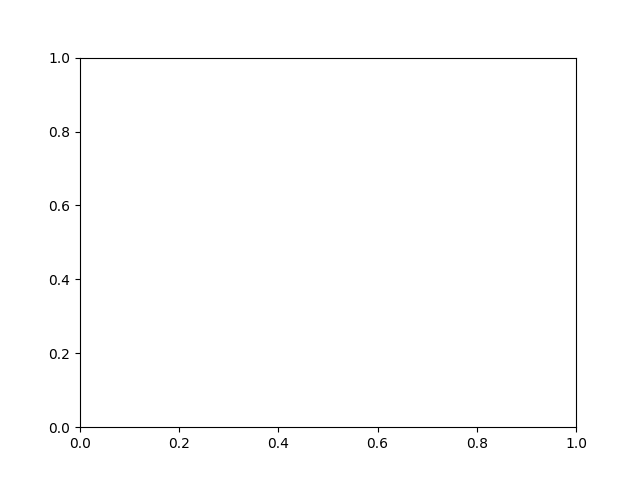

In [1]:
%matplotlib widget

import numpy as np
import os
from glob import glob
from scipy import spatial, stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from spacer3d.Ripley import load_OIB, load_mask, load_tumor_locations, run_ripley, monte_carlo, set_aspect_ratio_equal
from spacer3d.utils import plot_ripley

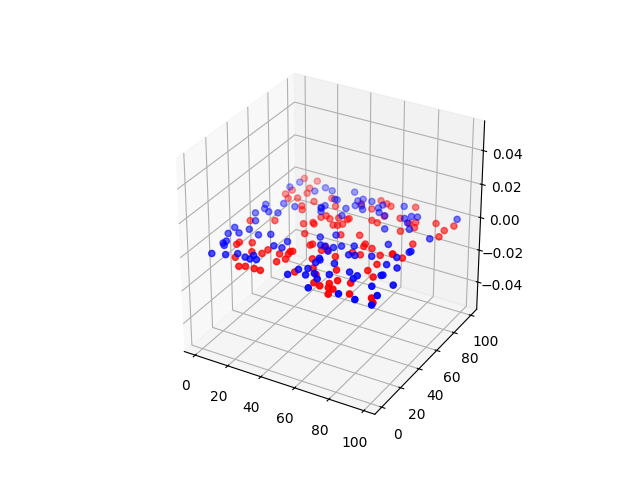

In [29]:
### NOTE: spacer3d functions expect points to be given as [Z, Y, X] for 3D, and [Y, X] for 2D

# 2D Example
test_set1 = stats.uniform.rvs(loc=0, scale=100, size=(100,2))
test_set2 = stats.uniform.rvs(loc=0, scale=100, size=(100,2))
test_mask = np.ones((100, 100))
test_radii = np.arange(2, 50)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
set_aspect_ratio_equal(ax)
ax.scatter(test_set1[:, 1],test_set1[:, 0], color="#f00",marker="o", depthshade=True)
ax.scatter(test_set2[:, 1],test_set2[:, 0], color="#00f",marker="o", depthshade=True)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.03it/s]


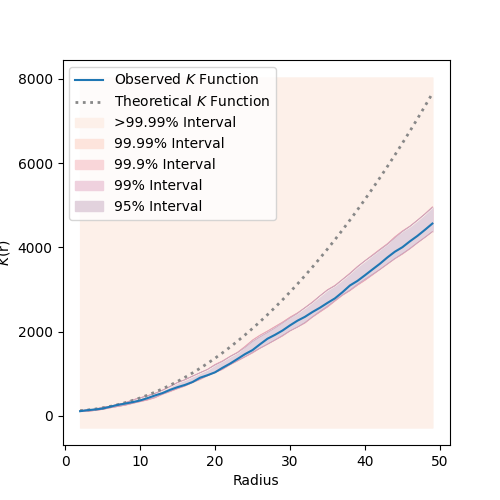

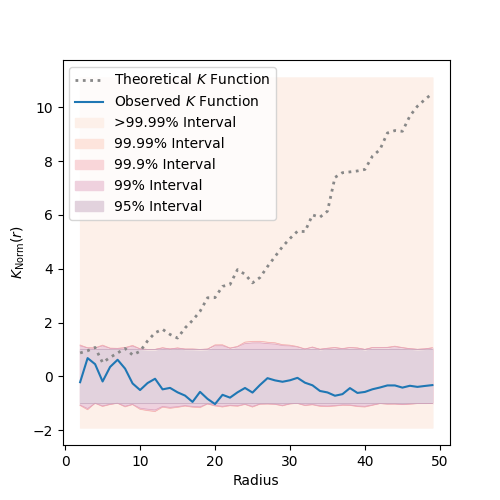

In [4]:
### Univariate analysis compares a set of points against itself
test_results = run_ripley(test_set1, test_set1, test_mask, test_radii, n_processes=1)

# Generate set of simulations to test observed results against
random_test_results = monte_carlo(test_set1, test_mask, test_radii, mode="2D", n_samples=20, n_processes=1)

# Plot Ripley's K functions
plot_ripley(test_results, rand_df=random_test_results, mode="2D")
plot_ripley(test_results, rand_df=random_test_results, mode="2D", norm=True)

### Loading platelet pointsets

In [2]:

def read_csv_points(path):
    df = pd.read_csv(path, index_col=0)
    return np.array(df.values.tolist())

def get_filepaths(path, ext="csv"):
    return sorted(glob(f"{path}/*.{ext}"))

control_pl_path = "/data/dkermany_data/Platelet_Project/Platelets-results-complete/Control/"
plerixafor_pl_path = "/data/dkermany_data/Platelet_Project/Platelets-results-complete/Plerixafor/"

control_pl_files = get_filepaths(control_pl_path)
plerixafor_pl_files = get_filepaths(plerixafor_pl_path)

# mask should not be X.max and Y.max as that could bias the results by excluding sparse areas within the sample
# mask = np.ones((np.rint(pl_points[:, 0].max()), np.rint(pl_points[:, 1].max())))
mask_size_lookup_path = "/data/dkermany_data/Platelet_Project/Platelets-results-complete/Platelet_image_size_CC.csv"
mask_size_lookup = pd.read_csv(mask_size_lookup_path, index_col=0)
mask_size_lookup.set_index("Filename", inplace=True)

radii = np.arange(2, 250)

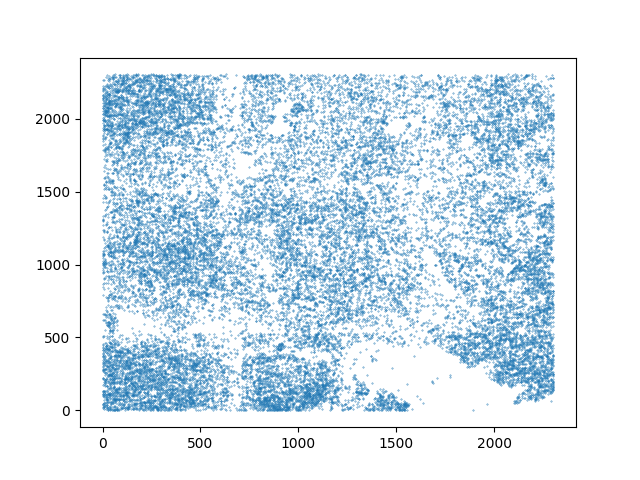

In [4]:
# plt.figure()
# plt.scatter(pl_points[:, 1], pl_points[:, 0], s=0.1)
# plt.show()

In [3]:
for i, f in enumerate(control_pl_files):
    print(f"{i+1}/{len(control_pl_files)}")

    f_points = read_csv_points(f)

    # reconcile filename vs filename in lookup csv file to get mask shape
    f_name = "_".join(os.path.splitext(os.path.basename(f))[0].split("_")[:-1])
    mask = np.ones((mask_size_lookup.loc[f_name, "Y"], mask_size_lookup.loc[f_name, "X"]))
    print("Mask shape", mask.shape)



    # Run Ripley and Monte Carlo simulations
    u_results = run_ripley(f_points, f_points, mask, radii, n_processes=55, boundary_correction=False)
    monte_results = monte_carlo(f_points, mask, radii, mode="2D", n_samples=20, n_processes=55, boundary_correction=False)

    output_dir = "/home/dkermany/BoneSegmentation/ripley_results/platelets/total/control/"
    name = "control"

    # Uncomment to save ripley results to csv to load into plots
    monte_results.to_csv(f"{output_dir}/{f_name}_random_univariate_{name}_rstats.csv")
    u_results.to_csv(f"{output_dir}/{f_name}_univariate_{name}_rstats.csv")

1/529
Mask shape (2048, 2048)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:44<00:00,  2.21s/it]

2/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:22<00:00,  1.12s/it]

3/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:15<00:00,  1.31it/s]

4/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:16<00:00,  1.22it/s]

5/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:11<00:00,  1.80it/s]

6/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:41<00:00,  2.07s/it]

7/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:00<00:00,  3.02s/it]

8/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:19<00:00,  3.96s/it]

9/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:22<00:00,  1.14s/it]

10/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:39<00:00,  4.96s/it]

11/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:04<00:00,  3.24s/it]

12/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:40<00:00,  5.02s/it]

13/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [02:41<00:00,  8.06s/it]

14/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:27<00:00,  4.40s/it]

15/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:56<00:00,  2.82s/it]

16/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:53<00:00,  2.67s/it]

17/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:34<00:00,  1.74s/it]

18/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:35<00:00,  1.78s/it]

19/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:30<00:00,  4.53s/it]

20/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:16<00:00,  1.24it/s]

21/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:27<00:00,  4.38s/it]

22/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:01<00:00,  3.10s/it]

23/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:48<00:00,  2.43s/it]

24/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:32<00:00,  1.63s/it]

25/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:40<00:00,  2.01s/it]

26/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:45<00:00,  2.27s/it]

27/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:44<00:00,  2.22s/it]

28/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:27<00:00,  1.35s/it]

29/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:37<00:00,  1.86s/it]

30/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:47<00:00,  2.40s/it]

31/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:12<00:00,  1.59it/s]

32/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:29<00:00,  1.47s/it]

33/529
Mask shape (1152, 1152)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:38<00:00,  1.94s/it]

34/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:51<00:00,  2.57s/it]

35/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:33<00:00,  1.69s/it]

36/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:22<00:00,  1.11s/it]

37/529
Mask shape (1024, 1024)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:17<00:00,  1.16it/s]

38/529
Mask shape (1024, 1024)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:07<00:00,  2.51it/s]

39/529
Mask shape (1024, 1024)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:09<00:00,  2.14it/s]

40/529
Mask shape (1024, 1024)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:12<00:00,  1.66it/s]

41/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:09<00:00,  2.11it/s]

42/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:11<00:00,  1.81it/s]

43/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:16<00:00,  1.20it/s]

44/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:13<00:00,  1.48it/s]

45/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:28<00:00,  1.43s/it]

46/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:22<00:00,  1.12s/it]

47/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:11<00:00,  1.75it/s]

48/529
Mask shape (2688, 2688)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:01<00:00,  3.09s/it]

49/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:00<00:00,  3.02s/it]

50/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:55<00:00,  5.79s/it]

51/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:38<00:00,  1.93s/it]

52/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:56<00:00,  2.83s/it]

53/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:14<00:00,  1.34it/s]

54/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:48<00:00,  2.43s/it]

55/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:41<00:00,  2.08s/it]

56/529
Mask shape (1280, 1280)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:31<00:00,  1.57s/it]

57/529
Mask shape (2176, 2176)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:30<00:00,  4.54s/it]

58/529
Mask shape (2176, 2176)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:01<00:00,  3.07s/it]

59/529
Mask shape (2176, 2176)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:21<00:00,  1.07s/it]

60/529
Mask shape (2176, 2176)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:42<00:00,  2.12s/it]

61/529
Mask shape (2176, 2176)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:51<00:00,  5.58s/it]

62/529
Mask shape (1280, 1280)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:23<00:00,  1.16s/it]

63/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:41<00:00,  2.09s/it]

64/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:48<00:00,  2.45s/it]

65/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:30<00:00,  1.51s/it]

66/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:51<00:00,  2.59s/it]

67/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:17<00:00,  1.15it/s]

68/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:50<00:00,  2.55s/it]

69/529
Mask shape (2304, 2304)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [02:15<00:00,  6.76s/it]

70/529
Mask shape (2304, 2304)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [03:09<00:00,  9.47s/it]

71/529
Mask shape (1024, 1024)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:44<00:00,  2.24s/it]

72/529
Mask shape (1024, 1024)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:40<00:00,  2.02s/it]

73/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:44<00:00,  5.22s/it]

74/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:08<00:00,  3.43s/it]

75/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:39<00:00,  4.96s/it]

76/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:35<00:00,  1.77s/it]

77/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:28<00:00,  1.44s/it]

78/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:35<00:00,  1.78s/it]

79/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:11<00:00,  1.75it/s]

80/529
Mask shape (2304, 2304)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:51<00:00,  5.56s/it]

81/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:22<00:00,  1.15s/it]

82/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:07<00:00,  2.56it/s]

83/529
Mask shape (1664, 1664)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:36<00:00,  1.84s/it]

84/529
Mask shape (1664, 1664)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:31<00:00,  1.56s/it]

85/529
Mask shape (1664, 1664)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:17<00:00,  1.15it/s]

86/529
Mask shape (1664, 1664)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:20<00:00,  1.01s/it]

87/529
Mask shape (1664, 1664)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:32<00:00,  1.64s/it]

88/529
Mask shape (1024, 1024)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:09<00:00,  2.15it/s]

89/529
Mask shape (1024, 1024)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:14<00:00,  1.37it/s]

90/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:55<00:00,  2.77s/it]

91/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:22<00:00,  1.13s/it]

92/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:41<00:00,  2.06s/it]

93/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:03<00:00,  3.18s/it]

94/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:42<00:00,  2.11s/it]

95/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:27<00:00,  1.35s/it]

96/529
Mask shape (2304, 2304)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [02:41<00:00,  8.07s/it]

97/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:09<00:00,  3.45s/it]

98/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [02:07<00:00,  6.37s/it]

99/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:08<00:00,  3.40s/it]

100/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:17<00:00,  3.86s/it]

101/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:56<00:00,  2.81s/it]

102/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:00<00:00,  3.01s/it]

103/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:34<00:00,  4.73s/it]

104/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:56<00:00,  2.83s/it]

105/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:12<00:00,  3.62s/it]

106/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:32<00:00,  1.64s/it]

107/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:41<00:00,  2.07s/it]

108/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:33<00:00,  1.66s/it]

109/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:27<00:00,  1.38s/it]

110/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:35<00:00,  1.76s/it]

111/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:31<00:00,  1.57s/it]

112/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:40<00:00,  2.01s/it]

113/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:29<00:00,  1.49s/it]

114/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:06<00:00,  2.97it/s]

115/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:07<00:00,  2.66it/s]

116/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:27<00:00,  4.39s/it]

117/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:36<00:00,  1.84s/it]

118/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:36<00:00,  4.81s/it]

119/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:47<00:00,  5.39s/it]

120/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:23<00:00,  4.16s/it]

121/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:30<00:00,  1.53s/it]

122/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:08<00:00,  2.44it/s]

123/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:20<00:00,  1.03s/it]

124/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:07<00:00,  3.35s/it]

125/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:37<00:00,  4.85s/it]

126/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:44<00:00,  2.22s/it]

127/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:30<00:00,  4.52s/it]

128/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:27<00:00,  1.38s/it]

129/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [02:01<00:00,  6.06s/it]

130/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:10<00:00,  3.52s/it]

131/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:46<00:00,  2.31s/it]

132/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:42<00:00,  2.10s/it]

133/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:51<00:00,  2.57s/it]

134/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:56<00:00,  2.82s/it]

135/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:22<00:00,  1.13s/it]

136/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:34<00:00,  4.73s/it]

137/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:12<00:00,  3.62s/it]

138/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:33<00:00,  1.68s/it]

139/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:52<00:00,  2.62s/it]

140/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:03<00:00,  3.16s/it]

141/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:52<00:00,  2.65s/it]

142/529
Mask shape (1024, 1024)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:20<00:00,  1.03s/it]

143/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:28<00:00,  1.42s/it]

144/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:55<00:00,  2.80s/it]

145/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:25<00:00,  1.29s/it]

146/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:35<00:00,  1.78s/it]

147/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:32<00:00,  1.64s/it]

148/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:33<00:00,  1.68s/it]

149/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:21<00:00,  1.05s/it]

150/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:14<00:00,  1.41it/s]

151/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:11<00:00,  1.68it/s]

152/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:18<00:00,  1.07it/s]

153/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:18<00:00,  1.06it/s]

154/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:12<00:00,  1.61it/s]

155/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:40<00:00,  5.03s/it]

156/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:11<00:00,  1.80it/s]

157/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:27<00:00,  1.39s/it]

158/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:14<00:00,  3.73s/it]

159/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:35<00:00,  4.79s/it]

160/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:11<00:00,  3.57s/it]

161/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:15<00:00,  3.77s/it]

162/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:59<00:00,  2.98s/it]

163/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:24<00:00,  4.24s/it]

164/529
Mask shape (1024, 1024)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:11<00:00,  1.78it/s]

165/529
Mask shape (1024, 1024)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:09<00:00,  2.12it/s]

166/529
Mask shape (1024, 1024)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:12<00:00,  1.66it/s]

167/529
Mask shape (1024, 1024)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:08<00:00,  2.42it/s]

168/529
Mask shape (1024, 1024)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:08<00:00,  2.44it/s]

169/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:04<00:00,  3.21s/it]

170/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:06<00:00,  3.32s/it]

171/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:07<00:00,  3.38s/it]

172/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:05<00:00,  3.29s/it]

173/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:18<00:00,  3.93s/it]

174/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:35<00:00,  4.78s/it]

175/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:18<00:00,  3.92s/it]

176/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:52<00:00,  5.61s/it]

177/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:54<00:00,  2.71s/it]

178/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:59<00:00,  2.95s/it]

179/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:06<00:00,  3.35s/it]

180/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [02:31<00:00,  7.58s/it]

181/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:37<00:00,  4.90s/it]

182/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:08<00:00,  3.42s/it]

183/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:03<00:00,  3.16s/it]

184/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:26<00:00,  4.33s/it]

185/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:03<00:00,  3.16s/it]

186/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:04<00:00,  3.20s/it]

187/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:13<00:00,  3.68s/it]

188/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:00<00:00,  3.05s/it]

189/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:45<00:00,  5.30s/it]

190/529
Mask shape (1664, 1664)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:26<00:00,  1.33s/it]

191/529
Mask shape (1664, 1664)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:50<00:00,  2.54s/it]

192/529
Mask shape (1664, 1664)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:48<00:00,  2.43s/it]

193/529
Mask shape (1664, 1664)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:31<00:00,  1.59s/it]

194/529
Mask shape (1664, 1664)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:58<00:00,  2.90s/it]

195/529
Mask shape (1664, 1664)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:48<00:00,  2.41s/it]

196/529
Mask shape (1664, 1664)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:40<00:00,  2.05s/it]

197/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:35<00:00,  4.79s/it]

198/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:49<00:00,  2.45s/it]

199/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:34<00:00,  4.70s/it]

200/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:33<00:00,  4.68s/it]

201/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:07<00:00,  3.36s/it]

202/529
Mask shape (2176, 2176)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:09<00:00,  3.45s/it]

203/529
Mask shape (2176, 2176)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:59<00:00,  2.95s/it]

204/529
Mask shape (2176, 2176)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:16<00:00,  3.85s/it]

205/529
Mask shape (2176, 2176)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:43<00:00,  5.17s/it]

206/529
Mask shape (2176, 2176)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:25<00:00,  4.26s/it]

207/529
Mask shape (2176, 2176)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:03<00:00,  3.15s/it]

208/529
Mask shape (2176, 2176)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:28<00:00,  4.43s/it]

209/529
Mask shape (2176, 2176)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:22<00:00,  4.14s/it]

210/529
Mask shape (2176, 2176)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:45<00:00,  2.29s/it]

211/529
Mask shape (2176, 2176)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:20<00:00,  4.04s/it]

212/529
Mask shape (1024, 1024)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:07<00:00,  2.62it/s]

213/529
Mask shape (2176, 2176)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:13<00:00,  3.70s/it]

214/529
Mask shape (1024, 1024)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:08<00:00,  2.23it/s]

215/529
Mask shape (1024, 1024)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:15<00:00,  1.32it/s]

216/529
Mask shape (1024, 1024)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:15<00:00,  1.29it/s]

217/529
Mask shape (1024, 1024)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:15<00:00,  1.25it/s]

218/529
Mask shape (1024, 1024)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:16<00:00,  1.21it/s]

219/529
Mask shape (1024, 1024)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:23<00:00,  1.16s/it]

220/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:06<00:00,  3.31s/it]

221/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:09<00:00,  3.45s/it]

222/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:07<00:00,  3.39s/it]

223/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:15<00:00,  3.75s/it]

224/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:09<00:00,  3.48s/it]

225/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:10<00:00,  3.51s/it]

226/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:22<00:00,  4.13s/it]

227/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:21<00:00,  4.10s/it]

228/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:11<00:00,  3.59s/it]

229/529
Mask shape (1408, 1408)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:40<00:00,  2.04s/it]

230/529
Mask shape (2176, 2176)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:11<00:00,  3.59s/it]

231/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:13<00:00,  3.65s/it]

232/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:05<00:00,  3.29s/it]

233/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:52<00:00,  2.62s/it]

234/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:16<00:00,  3.81s/it]

235/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:49<00:00,  2.45s/it]

236/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:27<00:00,  1.38s/it]

237/529
Mask shape (2176, 2176)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:35<00:00,  4.79s/it]

238/529
Mask shape (2176, 2176)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:38<00:00,  4.95s/it]

239/529
Mask shape (2176, 2176)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:32<00:00,  1.65s/it]

240/529
Mask shape (2176, 2176)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:41<00:00,  2.07s/it]

241/529
Mask shape (1152, 1152)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:35<00:00,  1.78s/it]

242/529
Mask shape (768, 768)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:10<00:00,  1.95it/s]

243/529
Mask shape (1280, 1280)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:23<00:00,  1.15s/it]

244/529
Mask shape (1280, 1280)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:13<00:00,  1.50it/s]

245/529
Mask shape (1280, 1280)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:15<00:00,  1.30it/s]

246/529
Mask shape (1280, 1280)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:15<00:00,  1.32it/s]

247/529
Mask shape (1280, 1280)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:10<00:00,  1.91it/s]

248/529
Mask shape (2304, 2304)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:31<00:00,  1.58s/it]

249/529
Mask shape (2304, 2304)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:48<00:00,  2.44s/it]

250/529
Mask shape (2304, 2304)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:31<00:00,  1.58s/it]

251/529
Mask shape (2176, 2176)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:09<00:00,  2.16it/s]

252/529
Mask shape (2304, 2304)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:30<00:00,  1.54s/it]

253/529
Mask shape (2304, 2304)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:13<00:00,  3.67s/it]

254/529
Mask shape (2304, 2304)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:01<00:00,  3.05s/it]

255/529
Mask shape (2304, 2304)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:47<00:00,  5.36s/it]

256/529
Mask shape (2304, 2304)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:32<00:00,  4.63s/it]

257/529
Mask shape (2304, 2304)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:56<00:00,  5.83s/it]

258/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:55<00:00,  2.80s/it]

259/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:58<00:00,  2.95s/it]

260/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:11<00:00,  3.57s/it]

261/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:44<00:00,  2.23s/it]

262/529
Mask shape (2176, 2176)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:25<00:00,  1.29s/it]

263/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:45<00:00,  2.27s/it]

264/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:02<00:00,  3.12s/it]

265/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:45<00:00,  2.27s/it]

266/529
Mask shape (2304, 2304)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:26<00:00,  4.32s/it]

267/529
Mask shape (2304, 2304)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:55<00:00,  2.79s/it]

268/529
Mask shape (2304, 2304)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:56<00:00,  2.81s/it]

269/529
Mask shape (2304, 2304)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:52<00:00,  2.62s/it]

270/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:44<00:00,  2.25s/it]

271/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:53<00:00,  2.66s/it]

272/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:48<00:00,  2.42s/it]

273/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:51<00:00,  2.60s/it]

274/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:23<00:00,  1.20s/it]

275/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:53<00:00,  2.69s/it]

276/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:19<00:00,  4.00s/it]

277/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:23<00:00,  4.19s/it]

278/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:29<00:00,  1.46s/it]

279/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:52<00:00,  2.61s/it]

280/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:00<00:00,  3.01s/it]

281/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:11<00:00,  3.55s/it]

282/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:17<00:00,  1.14it/s]

283/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:43<00:00,  5.19s/it]

284/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:53<00:00,  5.67s/it]

285/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:42<00:00,  2.13s/it]

286/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:32<00:00,  4.61s/it]

287/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:18<00:00,  3.92s/it]

288/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:54<00:00,  2.71s/it]

289/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:56<00:00,  2.83s/it]

290/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:03<00:00,  3.17s/it]

291/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:16<00:00,  3.83s/it]

292/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:27<00:00,  4.39s/it]

293/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:34<00:00,  4.72s/it]

294/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:35<00:00,  1.80s/it]

295/529
Mask shape (2304, 2304)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [02:12<00:00,  6.62s/it]

296/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:08<00:00,  3.41s/it]

297/529
Mask shape (2304, 2304)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [02:20<00:00,  7.04s/it]

298/529
Mask shape (2304, 2304)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:55<00:00,  5.77s/it]

299/529
Mask shape (2304, 2304)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [02:15<00:00,  6.78s/it]

300/529
Mask shape (2304, 2304)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:16<00:00,  3.84s/it]

301/529
Mask shape (2304, 2304)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:39<00:00,  4.97s/it]

302/529
Mask shape (2304, 2304)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [02:51<00:00,  8.60s/it]

303/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:10<00:00,  3.54s/it]

304/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:23<00:00,  4.19s/it]

305/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:47<00:00,  2.39s/it]

306/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:00<00:00,  3.02s/it]

307/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:58<00:00,  2.90s/it]

308/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:51<00:00,  2.57s/it]

309/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:01<00:00,  3.09s/it]

310/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:04<00:00,  3.24s/it]

311/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:46<00:00,  2.31s/it]

312/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:25<00:00,  1.26s/it]

313/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:22<00:00,  1.11s/it]

314/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:18<00:00,  1.08it/s]

315/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:04<00:00,  3.22s/it]

316/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:25<00:00,  1.29s/it]

317/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:25<00:00,  1.29s/it]

318/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:27<00:00,  1.36s/it]

319/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:32<00:00,  1.64s/it]

320/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:23<00:00,  1.17s/it]

321/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:16<00:00,  1.21it/s]

322/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:28<00:00,  1.43s/it]

323/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:17<00:00,  1.17it/s]

324/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:18<00:00,  1.08it/s]

325/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:23<00:00,  1.17s/it]

326/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:40<00:00,  2.03s/it]

327/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:34<00:00,  1.71s/it]

328/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:44<00:00,  2.23s/it]

329/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:32<00:00,  1.63s/it]

330/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:36<00:00,  1.82s/it]

331/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:46<00:00,  2.34s/it]

332/529
Mask shape (2304, 2304)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:58<00:00,  5.94s/it]

333/529
Mask shape (2304, 2304)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:58<00:00,  5.92s/it]

334/529
Mask shape (2304, 2304)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:41<00:00,  5.07s/it]

335/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:17<00:00,  1.11it/s]

336/529
Mask shape (2304, 2304)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [02:18<00:00,  6.92s/it]

337/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:34<00:00,  1.74s/it]

338/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:22<00:00,  1.13s/it]

339/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:13<00:00,  1.52it/s]

340/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:25<00:00,  1.25s/it]

341/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:28<00:00,  1.44s/it]

342/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:06<00:00,  3.02it/s]

343/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:07<00:00,  2.79it/s]

344/529
Mask shape (2304, 2304)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:03<00:00,  3.18s/it]

345/529
Mask shape (2304, 2304)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:59<00:00,  2.97s/it]

346/529
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:38<00:00,  1.91s/it]

347/529
Mask shape (2304, 2304)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:47<00:00,  2.37s/it]

348/529
Mask shape (2304, 2304)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:11<00:00,  3.56s/it]

349/529
Mask shape (2304, 2304)



 70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                         | 14/20 [00:49<00:21,  3.53s/it]

In [ ]:
for i, f in enumerate(plerixafor_pl_files):
    print(f"{i+1}/{len(plerixafor_pl_files)}")

    f_points = read_csv_points(f)

    # reconcile filename vs filename in lookup csv file to get mask shape
    f_name = "_".join(os.path.splitext(os.path.basename(f))[0].split("_")[:-1])
    mask = np.ones((mask_size_lookup.loc[f_name, "Y"], mask_size_lookup.loc[f_name, "X"]))
    print("Mask shape", mask.shape)



    # Run Ripley and Monte Carlo simulations
    u_results = run_ripley(f_points, f_points, mask, radii, n_processes=55, boundary_correction=False)
    monte_results = monte_carlo(f_points, mask, radii, mode="2D", n_samples=20, n_processes=55, boundary_correction=False)

    output_dir = "/home/dkermany/BoneSegmentation/ripley_results/platelets/total/plerixafor/"
    name = "plerixafor"

    # Uncomment to save ripley results to csv to load into plots
    monte_results.to_csv(f"{output_dir}/{f_name}_random_univariate_{name}_rstats.csv")
    u_results.to_csv(f"{output_dir}/{f_name}_univariate_{name}_rstats.csv")

1/30
Mask shape (2048, 2048)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:22<00:00,  1.13s/it]

2/30
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:30<00:00,  1.51s/it]

3/30
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:38<00:00,  1.91s/it]

4/30
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:41<00:00,  2.10s/it]

5/30
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:18<00:00,  3.90s/it]

6/30
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:01<00:00,  3.06s/it]

7/30
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:28<00:00,  4.41s/it]

8/30
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:07<00:00,  3.37s/it]

9/30
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:11<00:00,  3.57s/it]

10/30
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:51<00:00,  2.58s/it]

11/30
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:32<00:00,  1.62s/it]

12/30
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:27<00:00,  1.38s/it]

13/30
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:49<00:00,  2.45s/it]

14/30
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:14<00:00,  3.73s/it]

15/30
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:40<00:00,  2.01s/it]

16/30
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:40<00:00,  2.01s/it]

17/30
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:44<00:00,  2.24s/it]

18/30
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:28<00:00,  1.44s/it]

19/30
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:37<00:00,  1.87s/it]

20/30
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:46<00:00,  2.35s/it]

21/30
Mask shape (1920, 1920)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:35<00:00,  1.79s/it]

22/30
Mask shape (1920, 1920)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:24<00:00,  1.22s/it]

23/30
Mask shape (1920, 1920)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:17<00:00,  1.14it/s]

24/30
Mask shape (1920, 1920)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:22<00:00,  1.14s/it]

25/30
Mask shape (1920, 1920)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:09<00:00,  2.19it/s]

26/30
Mask shape (1920, 1920)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:10<00:00,  1.87it/s]

27/30
Mask shape (1920, 1920)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:06<00:00,  2.92it/s]

28/30
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:23<00:00,  1.18s/it]

29/30
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:19<00:00,  1.02it/s]

30/30
Mask shape (2048, 2048)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:30<00:00,  1.55s/it]


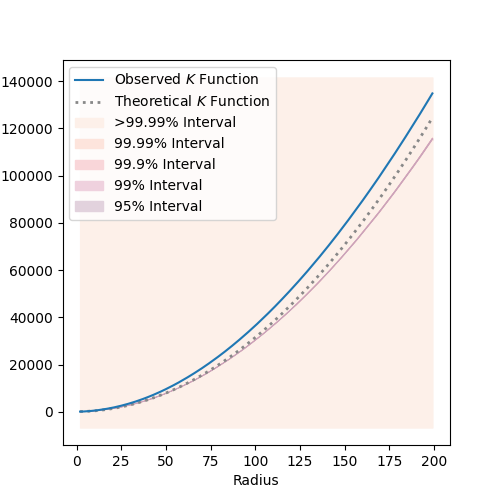

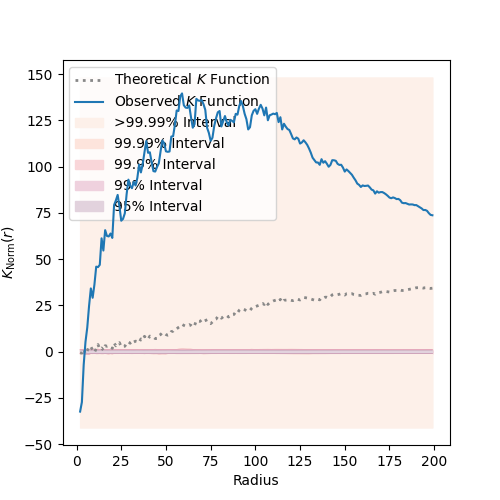

In [49]:
# Plot Ripley's K functions
plot_ripley(u_results, rand_df=monte_results, mode="2D")
plot_ripley(u_results, rand_df=monte_results, mode="2D", norm=True)

### Loading real data pointsets for comparison

In [ ]:
### Loading Confocal Image (.OIB)
path = "/data/dkermany_data/Bone_Project/FV10__oibs/FV10__20190620_111343.oib"
filename = os.path.splitext(os.path.basename(path))[0]

# step sizes to convert tumor micron locations to pixel
steps = (0.621, 0.621, 3.14) if filename=="FV10__20210112_164055" else (1.242, 1.242, 2.66)

# filename, viewer, steps = load_OIB(path)

In [ ]:
### Loading 3D Binary Mask (.SEG.NRRD)
# Mask and points should be loaded with coordinates in shape (z, y, x)
mask_path = f"./lib/masks/{filename}.seg.nrrd"
mask = load_mask(mask_path)

In [ ]:
### Loading Tumor Cell Locations (.CSV)
tumor_csv_path = "./lib/tumor_locations.csv"
tumor_points = load_tumor_locations(tumor_csv_path, filename, steps)

In [ ]:
branch_points_path = f"./lib/branch_points/{filename}_branch_points.npy"
ng2_points_path = f"./lib/NG2_centroids/{filename}_NG2_centroids.npy"
tvc_points_path = f"./lib/tortuous_segment_centroids/{filename}_tortuous_segment_centroid.npy"

In [ ]:
ng2_points = np.flip(np.load(ng2_points_path).T, axis=1) # put points into Z,Y,X format (N, 3)
branch_points = np.load(branch_points_path).T # branch points do not need to be flipped to be formatted correctly
tvc_points = np.rint(np.flip(np.load(tvc_points_path).T, axis=1)).astype(int) # put points into Z,Y,X format (N, 3)

### Run all univariate and bivariate comparisons

In [7]:
all_points = {
    "tumor": tumor_points,
    "ng2": ng2_points,
    "branch": branch_points,
    "tvc": tvc_points
}

output_dir = "./ripley_results"

# Starting at 2 because radius of 1 causes errors at the boundaries
# where sometimes the entire circle falls outside of study area
# resulting division by zero errors in some instances
radii = np.arange(2, 100) 

# # Run univariate comparisons
for name, points in all_points.items():
    print(f"Running univariate analyses on: {name} points")
    CSR_results = monte_carlo(points, mask, radii, n_samples=100, n_processes=55, boundary_correction=False)
    u_results = run_ripley(points, points, mask, radii, n_processes=55, boundary_correction=False)

    # Uncomment to save ripley results to csv to load into plots
    # CSR_results.to_csv(f"{output_dir}/{filename}_random_univariate_{name}_rstats.csv")
    # u_results.to_csv(f"{output_dir}/{filename}_univariate_{name}_rstats.csv")

In [ ]:
# # Run multivariate comparisons with tumor
for name, points in all_points.items():
    if name != "tumor":
        print(f"Running multivariate analyses between tumor and {name} points")
        results = monte_carlo(tumor_points, mask, radii, points, n_samples=100, n_processes=55, boundary_correction=False)
        m_results = run_ripley(tumor_points, points, mask, radii, n_processes=55, boundary_correction=False)

#         Uncomment to save ripley results to csv to load into plots
#         CSR_results.to_csv(f"/home/dkermany/ripley_results/{filename}_random_multivariate_{name}_rstats.csv")
#         m_results.to_csv(os.path.join(output_dir, f"{filename}_multivariate_{name}_rstats.csv"))